C:\Users\Administrator\AppData\Local\Temp\ipykernel_14212\364185882.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=data, x='validation_corr', y='Model', dodge=False, order=model_order, palette=box_colors)


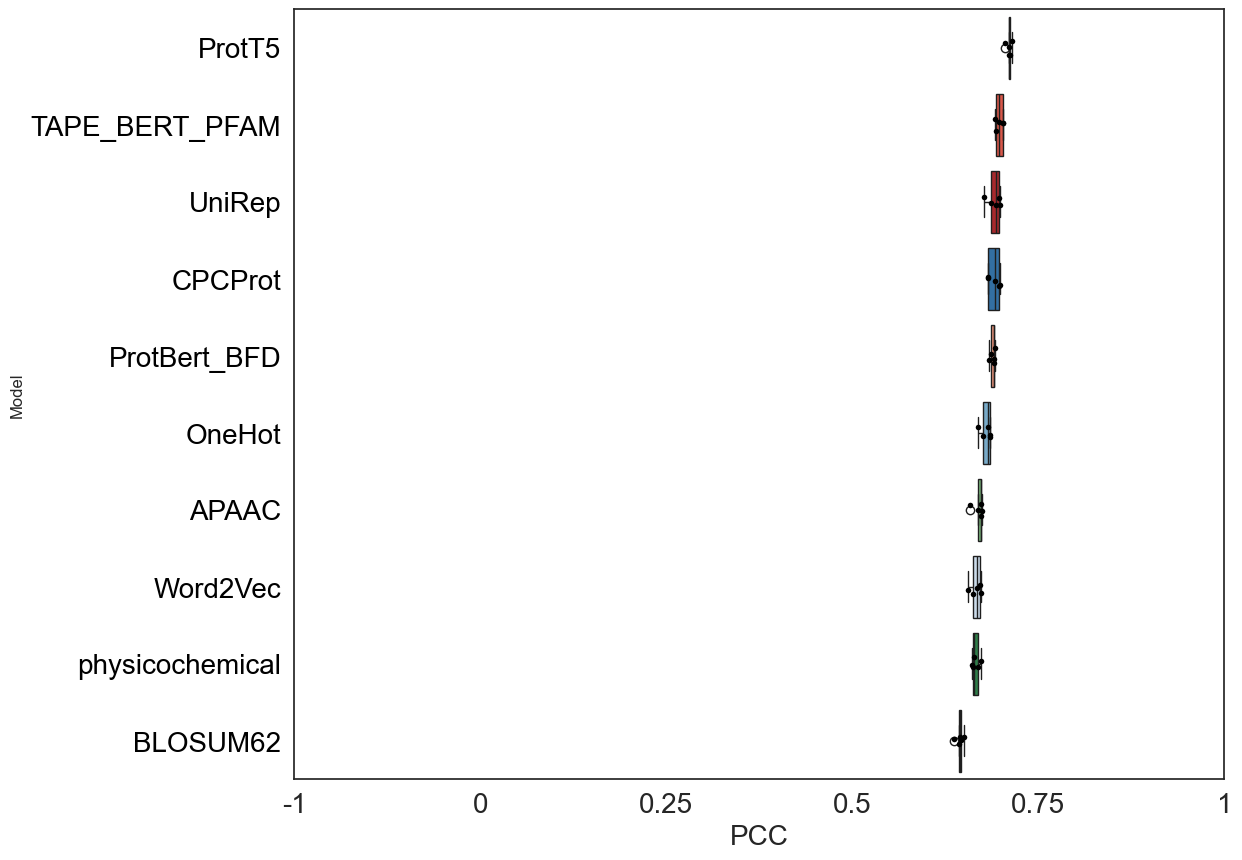

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import numpy as np
# 使用set_theme设置图形的风格，并移除网格线
sns.set_theme(style="white", rc={"axes.grid": False})

# 文件路径列表
file_paths = [
    "D:/OneDrive/我要毕业/results/Word2Vec_result_detail.csv",
    "D:/OneDrive/我要毕业/results/physicochemical_result_detail.csv",
    "D:/OneDrive/我要毕业/results/APAAC_result_detail.csv",
    "D:/OneDrive/我要毕业/results/BLOSUM62_result_detail.csv",
    "D:/OneDrive/我要毕业/results/CPCProt_result_detail.csv",
    "D:/OneDrive/我要毕业/results/OneHot_result_detail.csv",
    "D:/OneDrive/我要毕业/results/ProtBert_BFD_result_detail.csv",
    "D:/OneDrive/我要毕业/results/ProtT5_result_detail.csv",
    "D:/OneDrive/我要毕业/results/TAPE_BERT_PFAM_result_detail.csv",
    "D:/OneDrive/我要毕业/results/UniRep_result_detail.csv",
]

data = pd.DataFrame()
for file in file_paths:
    temp_df = pd.read_csv(file)  
    temp_df['Model'] = file.split('/')[-1].split('_result_detail.csv')[0]  
    temp_df['validation_corr'] /= 100 
    data = pd.concat([data, temp_df], ignore_index=True) 

model_order = data.groupby('Model')['validation_corr'].median().sort_values(ascending=False).index

def get_gradient_color(model_name):
    if model_name == 'BLOSUM62':
        return cm.Greens(0.25) 
    elif model_name == 'APAAC':
        return cm.Greens(0.50)  
    elif model_name == 'physicochemical':
        return cm.Greens(0.75)  
    elif model_name == 'Word2Vec':
        return cm.Blues(0.25)
    elif model_name == 'OneHot':
        return cm.Blues(0.50) 
    elif model_name == 'CPCProt':
        return cm.Blues(0.75) 
    elif model_name == 'ProtBert_BFD':
        return cm.Reds(0.40)  
    elif model_name == 'TAPE_BERT_PFAM':
        return cm.Reds(0.60)  
    elif model_name == 'UniRep':
        return cm.Reds(0.80)  
    elif model_name == 'ProtT5':
        return cm.Reds(1.00)  
    return 'gray'  

box_colors = [get_gradient_color(model) for model in model_order]

data['adjusted_validation_corr'] = data['validation_corr'].apply(
    lambda x: x + 0.1 if x < 0 else x
)  

plt.figure(figsize=(12, 10))
ax = sns.boxplot(data=data, x='validation_corr', y='Model', dodge=False, order=model_order, palette=box_colors)

sns.stripplot(data=data, x='validation_corr', y='Model', color='black', size=4, jitter=True, order=model_order)

x_range = np.linspace(-0.1, 1, 6)  
x_labels = ['-1', '0', '0.25', '0.5', '0.75','1'] 

plt.xlim(-0.1, 1)  
plt.xticks(x_range, x_labels, fontsize=20)  

for label in ax.get_yticklabels():
    label.set_color('black')  
plt.yticks(fontsize=20)

plt.xlabel('PCC', fontsize=20)  
plt.show()